In [69]:
#creating a chatbot using langgraph and groq model

In [68]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [53]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph.state import StateGraph,START,END

In [54]:
groq_api_key=os.getenv("GROQ_API_KEY")

In [55]:
llm=ChatGroq(model="gemma2-9b-it",api_key=groq_api_key)

In [56]:
class State(TypedDict):
    messages:Annotated[list,add_messages]


In [57]:
def chatbot(state:State):
    return ({"messages":llm.invoke(state["messages"])})

In [58]:
workflow=StateGraph(State)

In [59]:
workflow.add_node("chatbot",chatbot)

In [60]:
workflow.add_edge(START,"chatbot")

In [61]:
workflow.add_edge("chatbot",END)

In [62]:
graph=workflow.compile()

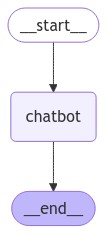

In [63]:
from IPython.display import display,Image
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [67]:
while True:
    user_input=input("enter the question")
    if user_input.lower() in ["quit","q"]:
        break
    else:
        for event in graph.stream({"messages":("user",user_input)}):
            print(event.values())
            for val in event.values():
                print(val["messages"])
                print("aimessage",val["messages"].content)
            

dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😄\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 6.9e-07, 'queue_time': 0.013887449000000001, 'total_time': 0.029091599}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-292f03fa-435b-4cb2-b8d0-deb771c891c4-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})}])
content='Hello! 👋 \n\nHow can I help you today? 😄\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 6.9e-07, 'queue_time': 0.013887449000000001, 'total_time': 0.029091599}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-292f03fa-